`Assignment# 02:` Linear  Regression and Data  Visualization\
`Submitted By:` Hamesh Raj\
`Email:` hm.raisingani@gmail.com\
`Address:` https://github.com/rajoad23\
`Date:` 26-02-2024

### import libararies

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### load dataset

In [80]:
df = pd.read_csv("HousingPrices.csv")

### Show the top 10 rows (hint: head function)

In [81]:
df.head(10)


,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,no,no,no,yes,2,furnished,13300000
1,8960,?,4,4,yes,no,no,no,yes,3,furnished,12250000
2,?,3,2,2,yes,no,yes,no,no,2,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,11410000
5,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,10850000
6,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,10150000
7,16200,5,3,?,yes,no,no,no,no,0,unfurnished,10150000
8,8100,4,1,2,yes,yes,yes,no,yes,2,furnished,9870000
9,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished,9800000


### Show the last 10 rows (hint: tail function)

In [82]:
df.tail(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Furnishingstatus,Price
535,3360,2,1,1,yes,no,no,no,no,1,unfurnished,2100000
536,3420,5,1,2,no,no,no,no,no,0,unfurnished,1960000
537,?,3,1,2,yes,no,no,no,no,0,unfurnished,1890000
538,?,2,1,1,yes,no,no,no,no,0,unfurnished,1890000
539,2990,2,1,1,no,no,no,no,no,1,unfurnished,1855000
540,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,1820000
541,2400,3,1,1,no,no,no,no,no,0,semi-furnished,1767150
542,3620,2,1,1,yes,no,no,no,no,0,unfurnished,1750000
543,2910,3,1,1,no,no,no,no,no,0,furnished,1750000
544,3850,3,1,2,yes,no,no,no,no,0,unfurnished,1750000


### Shape of column: Number of rows and Number of columns

In [83]:
df.shape
print("Rows in the dataset: ", df.shape[0])
print("Columns in the dataset: ", df.shape[1])

Rows in the dataset:  545
Columns in the dataset:  12


In [84]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Guestroom',
       'Basement', 'Hotwaterheating', 'Airconditioning', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

### Information of the dataset

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              545 non-null    object
 1   Bedrooms          545 non-null    object
 2   Bathrooms         545 non-null    object
 3   Stories           545 non-null    object
 4   Mainroad          545 non-null    object
 5   Guestroom         545 non-null    object
 6   Basement          545 non-null    object
 7   Hotwaterheating   545 non-null    object
 8   Airconditioning   545 non-null    object
 9   Parking           545 non-null    object
 10  Furnishingstatus  545 non-null    object
 11  Price             545 non-null    object
dtypes: object(12)
memory usage: 51.2+ KB


### Drop the following columns
- Guestroom
- Basement
- Hotwaterheating
- Airconditioning

In [86]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Guestroom',
       'Basement', 'Hotwaterheating', 'Airconditioning', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

In [87]:
df.drop(['Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning'],axis=1, inplace=True)

In [88]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

In [89]:
df.describe() #Does not include columns with non-numeric data types 

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
count,545,545,545,545,545,545,545,545
unique,280,7,5,5,2,5,3,220
top,6000,3,1,2,yes,0,semi-furnished,4200000
freq,24,297,398,233,468,296,227,17


In [90]:
df.describe(include="all")

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
count,545,545,545,545,545,545,545,545
unique,280,7,5,5,2,5,3,220
top,6000,3,1,2,yes,0,semi-furnished,4200000
freq,24,297,398,233,468,296,227,17


### Some columns have missing values
- Identify them
- Hint : Missing values are represented by ?

In [91]:
# Identify columns with missing values

columns_with_missing_values = df.columns[df.isin(['?']).any()].tolist()

print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'Price']


In [92]:
# Columns with number of missing values "?"

missing_values_count = df[columns_with_missing_values].eq('?').sum()

print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
Area         9
Bedrooms     7
Bathrooms    5
Stories      7
Parking      6
Price        3
dtype: int64


In [93]:
# another way to count values of "?" in the columns.

# df = pd.DataFrame(df)
# missing_values = (df == '?').sum()
# print(missing_values)

# Columns with number of missing values "?"

# columns_with_missing_values = missing_values[missing_values > 0].index
# print(columns_with_missing_values)

In [94]:
# Assuming df is  DataFrame with missing values represented as '?'
# Replace '?' with NaN

df.replace('?', pd.NA, inplace=True)

In [95]:
# Convert numeric columns to numeric type

numeric_columns = ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [96]:
# Fill missing values in identified columns with the mean of each column's mean

for column in columns_with_missing_values:
    if column in numeric_columns:
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)

In [97]:
mean_values = df[numeric_columns].mean()

print("Mean values of each specified column:")
print(mean_values)

Mean values of each specified column:
Area         5151.671642
Bedrooms        2.968401
Bathrooms       1.285185
Stories         1.806691
Parking         0.692022
dtype: float64


In [98]:
df.head(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
0,7420.000000,4.000000,2.0,3.000000,yes,2.0,furnished,13300000
1,8960.000000,2.968401,4.0,4.000000,yes,3.0,furnished,12250000
2,5151.671642,3.000000,2.0,2.000000,yes,2.0,semi-furnished,12250000
3,7500.000000,4.000000,2.0,2.000000,yes,3.0,furnished,12215000
4,7420.000000,4.000000,1.0,2.000000,yes,2.0,furnished,11410000
5,7500.000000,3.000000,3.0,1.000000,yes,2.0,semi-furnished,10850000
6,8580.000000,4.000000,3.0,4.000000,yes,2.0,semi-furnished,10150000
7,16200.000000,5.000000,3.0,1.806691,yes,0.0,unfurnished,10150000
8,8100.000000,4.000000,1.0,2.000000,yes,2.0,furnished,9870000
9,5750.000000,3.000000,2.0,4.000000,yes,1.0,unfurnished,9800000


In [99]:
# Convert the "numeric_columns" column back to integer type
df[numeric_columns] = df[numeric_columns].astype(int)

In [100]:
df.head(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,2,furnished,13300000
1,8960,2,4,4,yes,3,furnished,12250000
2,5151,3,2,2,yes,2,semi-furnished,12250000
3,7500,4,2,2,yes,3,furnished,12215000
4,7420,4,1,2,yes,2,furnished,11410000
5,7500,3,3,1,yes,2,semi-furnished,10850000
6,8580,4,3,4,yes,2,semi-furnished,10150000
7,16200,5,3,1,yes,0,unfurnished,10150000
8,8100,4,1,2,yes,2,furnished,9870000
9,5750,3,2,4,yes,1,unfurnished,9800000


In [101]:
# Check again for columns with missing values

columns_with_missing_values_after_fill = df.columns[df.isna().any()].tolist()
print("Columns with missing values after filling:", columns_with_missing_values_after_fill)

Columns with missing values after filling: ['Price']


### How will you deal with missing values in “price” column?
- Drop the whole row? or or something else?

### 1 Handle missing values in Price column

In [102]:
df['Price'].dtypes

dtype('O')

In [103]:
# Convert "Price" column to numeric
df['Price'].replace("?", np.nan, inplace=True)

In [104]:
# Convert "Price" column to numeric

df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

In [105]:
df.dtypes

Area                  int32
Bedrooms              int32
Bathrooms             int32
Stories               int32
Mainroad             object
Parking               int32
Furnishingstatus     object
Price               float64
dtype: object

In [106]:
df[["Furnishingstatus", "Price"]]

,Furnishingstatus,Price
0,furnished,13300000.0
1,furnished,12250000.0
2,semi-furnished,12250000.0
3,furnished,12215000.0
4,furnished,11410000.0
...,...,...
540,unfurnished,1820000.0
541,semi-furnished,1767150.0
542,unfurnished,1750000.0
543,furnished,1750000.0


In [107]:
# Calculate the mean prices grouped by "Furnishingstatus"
mean_prices = df.groupby("Furnishingstatus")["Price"].transform('mean')

# Fill NaN values in "Price" column with mean prices
df["Price"].fillna(mean_prices, inplace=True)

In [108]:
df = pd.DataFrame(df)
missing_values = (df == '?').sum()

missing_values

Area                0
Bedrooms            0
Bathrooms           0
Stories             0
Mainroad            0
Parking             0
Furnishingstatus    0
Price               0
dtype: int64

In [109]:
df.head(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
0,7420,4,2,3,yes,2,furnished,13300000.0
1,8960,2,4,4,yes,3,furnished,12250000.0
2,5151,3,2,2,yes,2,semi-furnished,12250000.0
3,7500,4,2,2,yes,3,furnished,12215000.0
4,7420,4,1,2,yes,2,furnished,11410000.0
5,7500,3,3,1,yes,2,semi-furnished,10850000.0
6,8580,4,3,4,yes,2,semi-furnished,10150000.0
7,16200,5,3,1,yes,0,unfurnished,10150000.0
8,8100,4,1,2,yes,2,furnished,9870000.0
9,5750,3,2,4,yes,1,unfurnished,9800000.0


In [110]:
df.tail(10)

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
535,3360,2,1,1,yes,1,unfurnished,2100000.0
536,3420,5,1,2,no,0,unfurnished,1960000.0
537,5151,3,1,2,yes,0,unfurnished,1890000.0
538,5151,2,1,1,yes,0,unfurnished,1890000.0
539,2990,2,1,1,no,1,unfurnished,1855000.0
540,3000,2,1,1,yes,2,unfurnished,1820000.0
541,2400,3,1,1,no,0,semi-furnished,1767150.0
542,3620,2,1,1,yes,0,unfurnished,1750000.0
543,2910,3,1,1,no,0,furnished,1750000.0
544,3850,3,1,2,yes,0,unfurnished,1750000.0


In [111]:
df.dtypes

Area                  int32
Bedrooms              int32
Bathrooms             int32
Stories               int32
Mainroad             object
Parking               int32
Furnishingstatus     object
Price               float64
dtype: object

### How will you deal with columns with Y/N or categorical data?
- 1. MainRoad (Y/N)
- 2. Furnishing Status (furnished / semi-furnished /unfurnished)

In [112]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

### Perform one-hot encoding for 'Mainroad' column directly

In [113]:
# Assuming 'df' is a DataFrame containing the dataset
# Perform one-hot encoding for 'Mainroad' column directly

df['Mainroad'] = df['Mainroad'].map({'yes': 1, 'no': 0})

In [114]:
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price
0,7420,4,2,3,1,2,furnished,13300000.0
1,8960,2,4,4,1,3,furnished,12250000.0
2,5151,3,2,2,1,2,semi-furnished,12250000.0
3,7500,4,2,2,1,3,furnished,12215000.0
4,7420,4,1,2,1,2,furnished,11410000.0


In [115]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Parking',
       'Furnishingstatus', 'Price'],
      dtype='object')

### Perform one-hot encoding for 'Furnishingstatus' column

In [116]:
# Perform one-hot encoding for 'Furnishingstatus' column
df_encoded = pd.get_dummies(df['Furnishingstatus'])

# Convert the encoded columns to numerical values (0 or 1)
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

In [117]:
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Furnishingstatus,Price,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,2,furnished,13300000.0,1,0,0
1,8960,2,4,4,1,3,furnished,12250000.0,1,0,0
2,5151,3,2,2,1,2,semi-furnished,12250000.0,0,1,0
3,7500,4,2,2,1,3,furnished,12215000.0,1,0,0
4,7420,4,1,2,1,2,furnished,11410000.0,1,0,0


In [118]:
# Drop the 'Furnishingstatus' column

df.drop('Furnishingstatus', axis=1, inplace=True)
df.head()

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,Price,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,2,13300000.0,1,0,0
1,8960,2,4,4,1,3,12250000.0,1,0,0
2,5151,3,2,2,1,2,12250000.0,0,1,0
3,7500,4,2,2,1,3,12215000.0,1,0,0
4,7420,4,1,2,1,2,11410000.0,1,0,0


In [119]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad', 'Parking',
       'Price', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            545 non-null    int32  
 1   Bedrooms        545 non-null    int32  
 2   Bathrooms       545 non-null    int32  
 3   Stories         545 non-null    int32  
 4   Mainroad        545 non-null    int64  
 5   Parking         545 non-null    int32  
 6   Price           545 non-null    float64
 7   furnished       545 non-null    int32  
 8   semi-furnished  545 non-null    int32  
 9   unfurnished     545 non-null    int32  
dtypes: float64(1), int32(8), int64(1)
memory usage: 25.7 KB


### Try some visualization (matplotlib)

- Line Charts
- X-Axis = Area, Y-Axis = Price
- X-Axis = Bedrooms, Y-Axis = Price
- X-Axis = Bedrooms, Y-Axis = Area
- X-Axis = Bedrooms, Y-Axis = Stories
- X-Axis = Area, Y-Axis = Stories

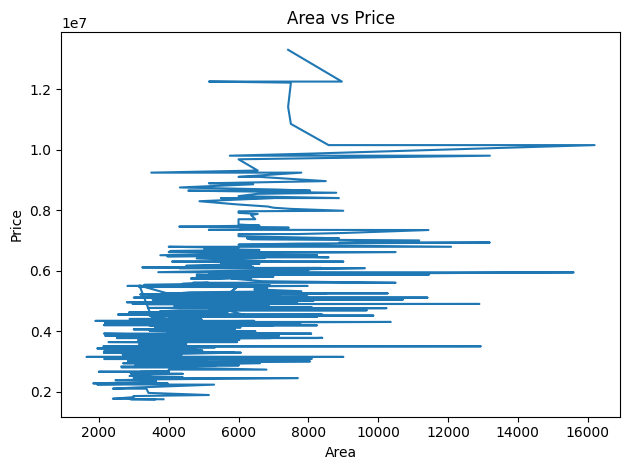

In [121]:
# Line chart: Area vs Price
plt.plot(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.tight_layout()
plt.show()

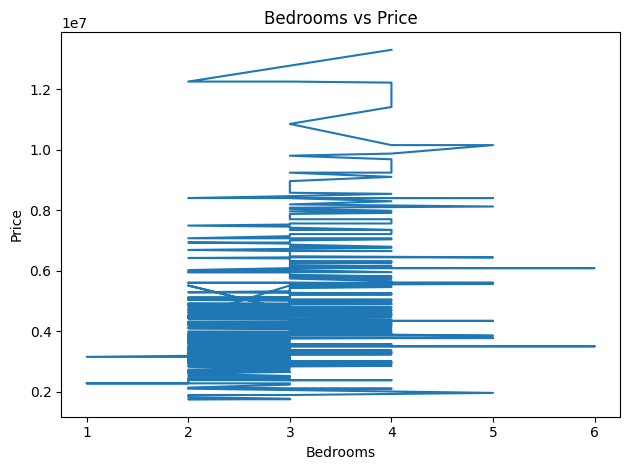

In [122]:
# Line chart: Bedrooms vs Price
plt.plot(df['Bedrooms'], df['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.tight_layout()
plt.show()

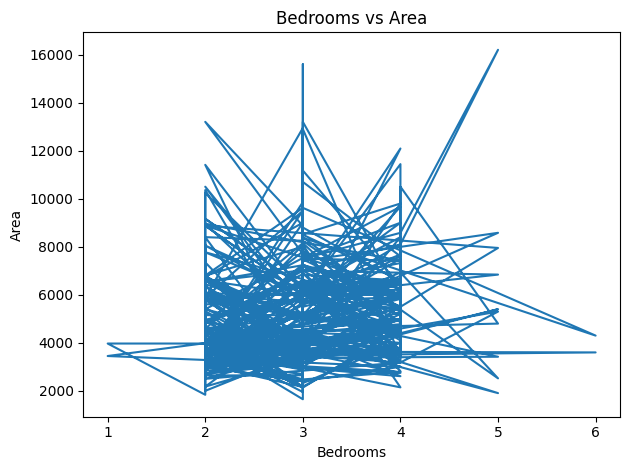

In [123]:
# Line chart: Bedrooms vs Area
plt.plot(df['Bedrooms'], df['Area'])
plt.xlabel('Bedrooms')
plt.ylabel('Area')
plt.title('Bedrooms vs Area')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Bedrooms vs Stories')

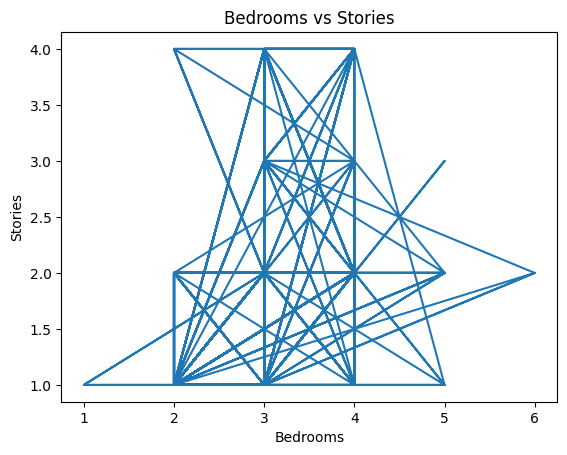

In [124]:
# Line chart: Bedrooms vs Stories
plt.plot(df['Bedrooms'], df['Stories'])
plt.xlabel('Bedrooms')
plt.ylabel('Stories')
plt.title('Bedrooms vs Stories')

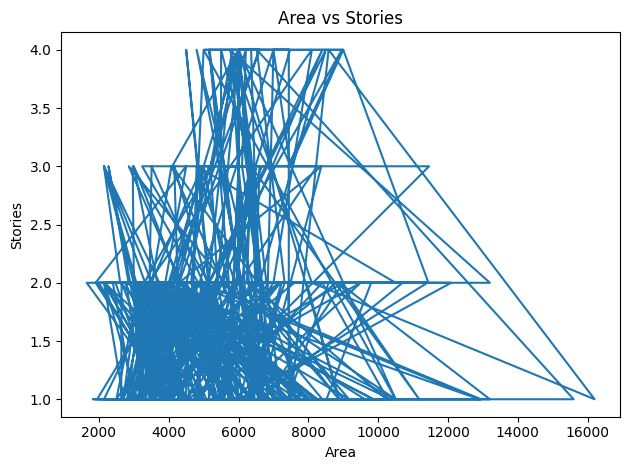

In [125]:

# Line chart: Area vs Stories
plt.plot(df['Area'], df['Stories'])
plt.xlabel('Area')
plt.ylabel('Stories')
plt.title('Area vs Stories')
plt.tight_layout()
plt.show()

### Develop a linear regression model. Use all remaining columns. Identify the error.

In [126]:
# Check for NaN values in each column
nan_values_per_column = df.isna().sum()

print("NaN values per column:")
print(nan_values_per_column)

NaN values per column:
Area              0
Bedrooms          0
Bathrooms         0
Stories           0
Mainroad          0
Parking           0
Price             0
furnished         0
semi-furnished    0
unfurnished       0
dtype: int64


In [127]:
# Split data into training and testing sets
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X

,Area,Bedrooms,Bathrooms,Stories,Mainroad,Parking,furnished,semi-furnished,unfurnished
0,7420,4,2,3,1,2,1,0,0
1,8960,2,4,4,1,3,1,0,0
2,5151,3,2,2,1,2,0,1,0
3,7500,4,2,2,1,3,1,0,0
4,7420,4,1,2,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,2,0,0,1
541,2400,3,1,1,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,1
543,2910,3,1,1,0,0,1,0,0


In [129]:
y

0      13300000.0
1      12250000.0
2      12250000.0
3      12215000.0
4      11410000.0
          ...    
540     1820000.0
541     1767150.0
542     1750000.0
543     1750000.0
544     1750000.0
Name: Price, Length: 545, dtype: float64

In [130]:
# Develop a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
# Make predictions
y_pred = model.predict(X_test)

In [132]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2387201382371.88
